In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Statistics

In [3]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [6]:
# (Population) Parameter
np.median(united.column('Delay'))
#np.average(united.column('Delay'))

2.0

In [16]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

0.5

In [31]:
# (Sample) Statistic
np.median(united.sample(1000).column('Delay'))

3.0

### Probability & Empirical Distributions of a Statistic

In [32]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [35]:
sample_median(10)

2.5

In [36]:
num_simulations = 2000

In [37]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

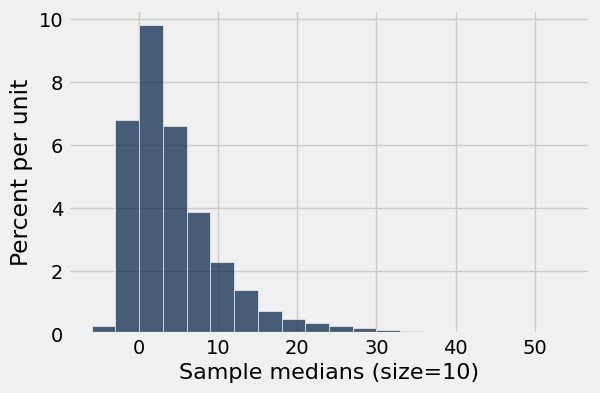

In [39]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [40]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

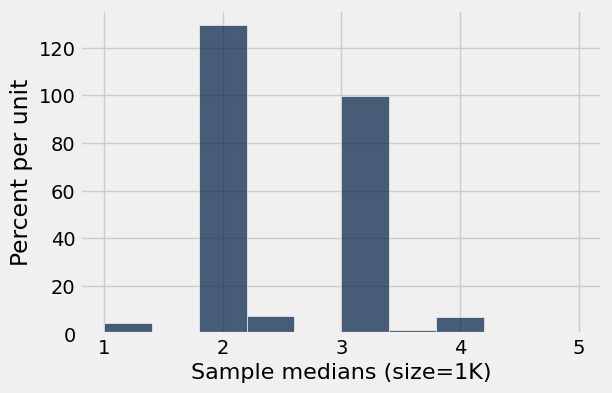

In [41]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist()

#### Empirical Distributions of a Statistic (Overlayed)

In [42]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [44]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)
sample_medians

Size 10,Size 100,Size 1000
1.5,0,3
0.5,3,2
2.5,6,2
3,2.5,3
2.5,3,1
2,4,3
-1,2,2.5
-1,4,3
5.5,2,3
4,0.5,1


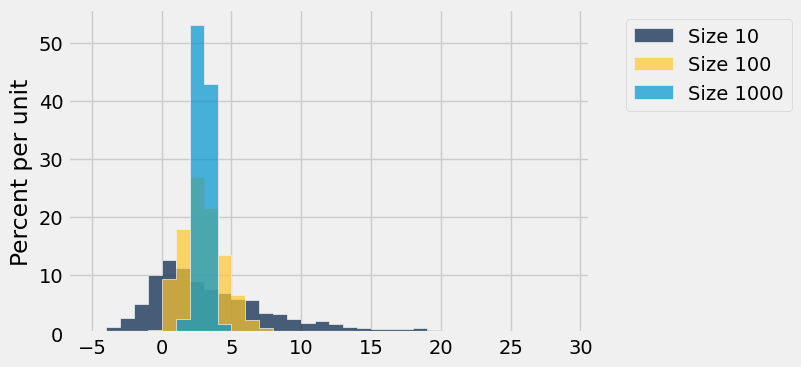

In [45]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [46]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [55]:
sample_proportions(100, population_proportions)

array([ 0.25,  0.75])

In [48]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [49]:
panel_proportion()

0.23

In [50]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

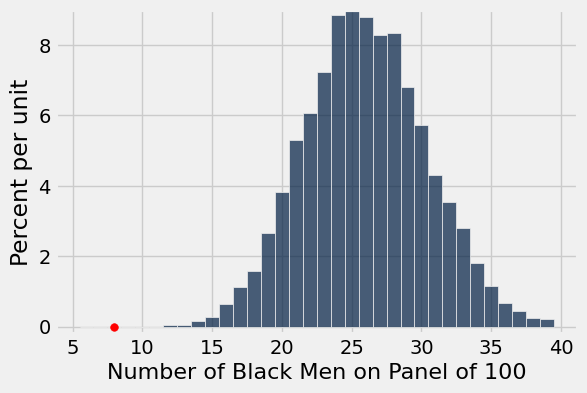

In [58]:
Table().with_column(
    'Number of Black Men on Panel of 100', panels
).hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

In [60]:
panels = Table().with_column(
    'Number of Black Men on Panel of 100', panels
)
panels.sort('Number of Black Men on Panel of 100')

Number of Black Men on Panel of 100
12
12
12
13
13
13
13
14
14
14
